Plots the train-val curves for the best models of each architecture: EfficientNet, ResNet, ViT

In [13]:
# basic imports
import pandas as pd
import tensorflow as tf
import os

In [14]:
def extract_train_val_acc_epochs(log_dir, steps_per_epoch):
    """
    Extract training and validation acc along with their respective epochs from a TensorBoard log file.

    Args:
    - log_dir (str): The directory containing the TensorBoard log file.
    - steps_per_epoch (int): The number of steps per epoch.

    Returns:
    - train_data (dict): A dictionary containing training epochs, acc, and loss values.
    - val_data (dict): A dictionary containing validation epochs, acc, and loss values.
    """
    train_data = {
        'epochs': [],
        'train_acc': [],
        'train_loss': []
    }

    val_data = {
        'epochs': [],
        'val_acc': [],
        'val_loss': []
    }

    # List all event files in the log directory
    event_files = tf.io.gfile.glob(os.path.join(log_dir, 'events*'))
  
    for event_file in event_files:
        last_epoch = -1
        for event in tf.compat.v1.train.summary_iterator(event_file):
            for value in event.summary.value:
                if value.tag == 'epoch':
                    last_epoch = value.simple_value
                elif last_epoch == -1:
                    continue
                elif value.tag == 'train_acc' :
                    train_data['epochs'].append(last_epoch) 
                    train_data['train_acc'].append(value.simple_value)
                elif value.tag == 'train_loss':
                    train_data['train_loss'].append(value.simple_value)
                elif value.tag == 'val_acc':
                    val_data['epochs'].append(last_epoch)
                    val_data['val_acc'].append(value.simple_value)
                elif value.tag == 'val_loss':
                    val_data['val_loss'].append(value.simple_value)

    return train_data, val_data

In [15]:
import pandas as pd
df_train = pd.read_csv('../data/SR_FR_train.csv')
steps_per_epoch = len(df_train) // 16
steps_per_epoch

43

In [16]:
import matplotlib.pyplot as plt

def plot_train_val_acc_loss_epochs(train_arr, val_arr, title):
    """
    Plot the training and validation accuracy and loss in terms of epochs.

    Args:
    - train_data (dict): A dictionary containing training epochs, acc, and loss values.
    - val_data (dict): A dictionary containing validation epochs, acc, and loss values.
    - title (str): The title of the plot.
    """
    num_plots = 2
    fig, ax = plt.subplots(1, 4, figsize=(15, 5))
    
    plot_titles = ['Train Accuracy', 'Validation Accuracy', 'Train Loss', 'Validation Loss']
    
    for i, (train_data, val_data) in enumerate(zip(train_arr, val_arr)):
        ax[0].plot(train_data['epochs'], train_data['train_acc'], label='train_acc')
        ax[1].plot(val_data['epochs'], val_data['val_acc'], label='val_acc')
        ax[0].set_ylabel('Accuracy')
        ax[0].title.set_text('Train Accuracy')
        ax[1].set_ylabel('Accuracy')
        ax[1].title.set_text('Validation Accuracy')
        ax[0].set_xlabel('Epochs')
        ax[1].set_xlabel('Epochs')
        ax[2].plot(train_data['epochs'], train_data['train_loss'], label='train_loss')
        ax[3].plot(val_data['epochs'], val_data['val_loss'], label='val_loss')
        ax[2].set_ylabel('Loss')
        ax[3].set_ylabel('Loss')
        ax[2].set_xlabel('Epochs')
        ax[3].set_xlabel('Epochs')
        ax[2].title.set_text('Train Loss')
        ax[3].title.set_text('Validation Loss')

        ax[0].ylim = (0.4, 0.95)
        ax[1].ylim = (0.4, 0.95)

        legend_labels = ['0','1', '2', '3', '4']
        # outside plot
        ax[3].legend(legend_labels, bbox_to_anchor=(1.05, 1), loc='upper left', title='Model Version')

    fig.suptitle(title)
    plt.tight_layout()
    plt.show()

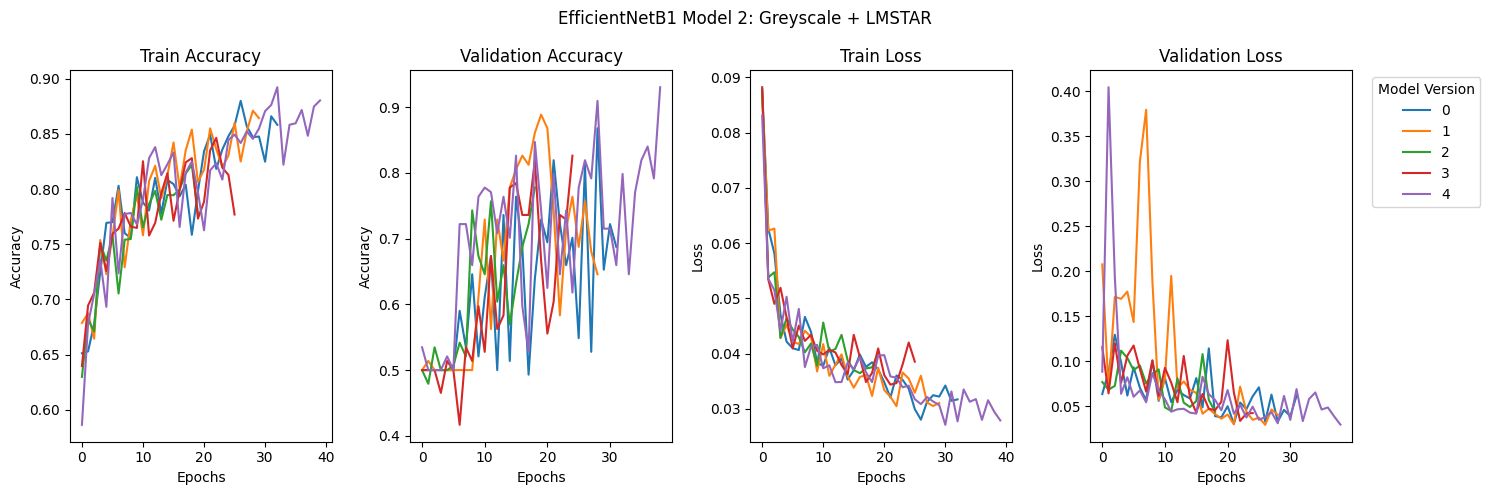

In [17]:
# change this according to your trained model

train_arr = []
val_arr = []
for i in range(5):
    log_dir = "../top_3/effnet_2_FR_SR_greyscale_downscale_random_crop_rotate_transform_42//version_" + str(i)
    train_data, val_data = extract_train_val_acc_epochs(log_dir, 43)
    train_arr.append(train_data)
    val_arr.append(val_data)

plot_train_val_acc_loss_epochs(train_arr, val_arr, 'EfficientNetB1 Model 2: Greyscale + LMSTAR')


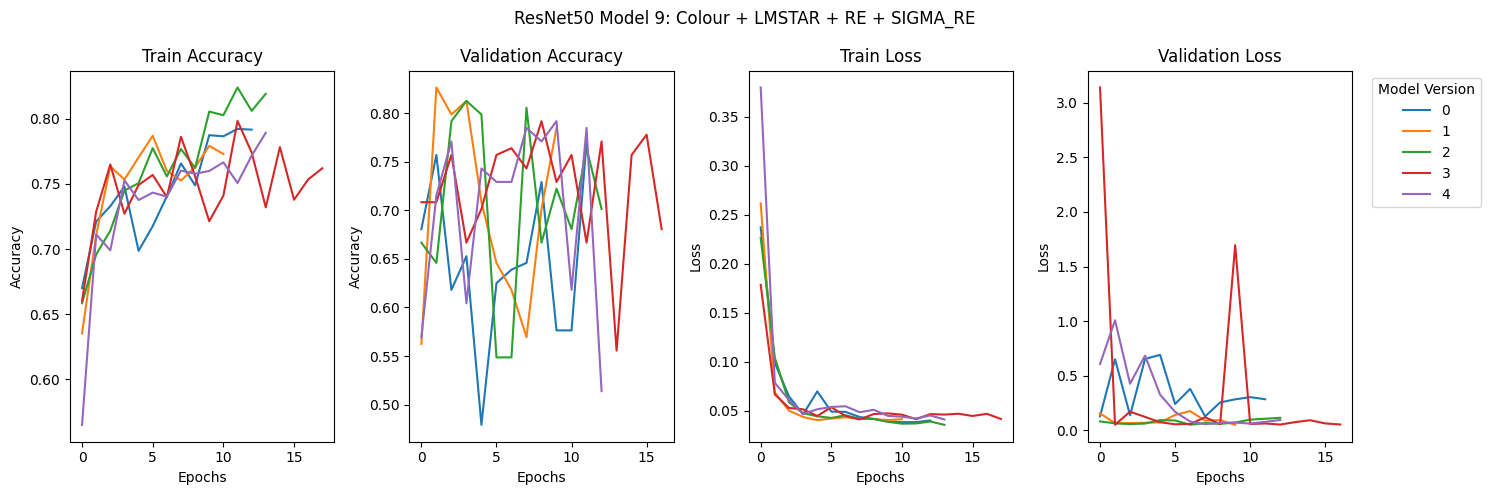

In [18]:
train_arr = []
val_arr = []
for i in range(5):
    log_dir = "../top_3/resnet_9_FR_SR_downscale_centrecrop_rotate_transform_42/version_" + str(i)
    train_data, val_data = extract_train_val_acc_epochs(log_dir, 43)
    train_arr.append(train_data)
    val_arr.append(val_data)

plot_train_val_acc_loss_epochs(train_arr, val_arr, 'ResNet50 Model 9: Colour + LMSTAR + RE + SIGMA_RE')


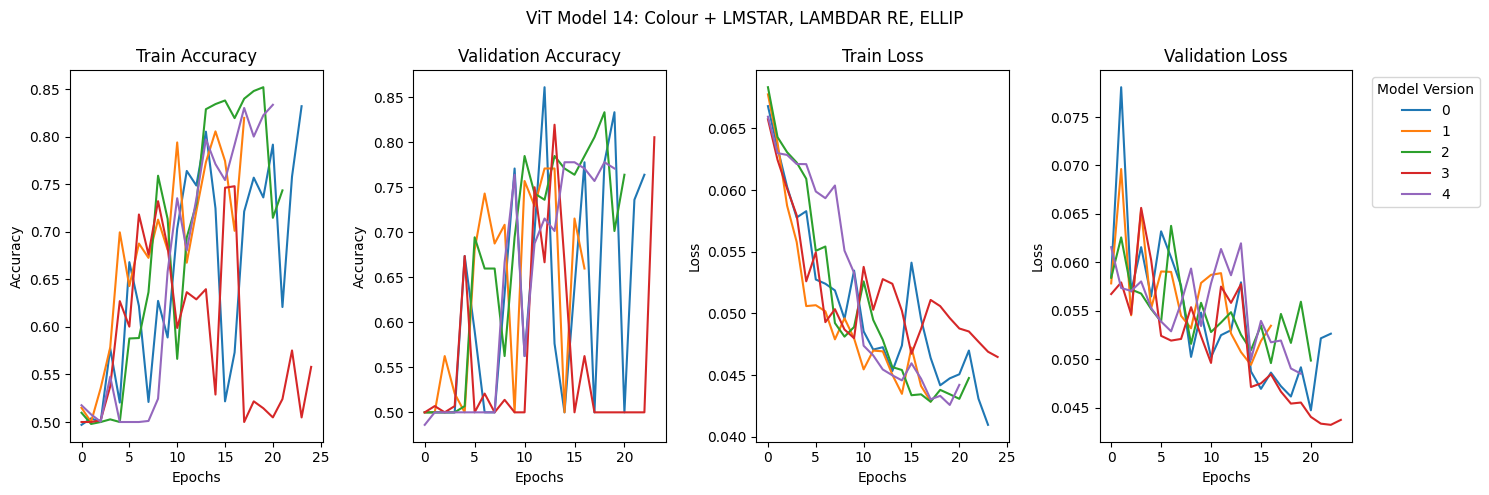

In [19]:
train_arr = []
val_arr = []
for i in range(5):
    log_dir = "../top_3/vit_14_FR_SR_downscale_centrecrop_rotate_transform_42//version_" + str(i)
    train_data, val_data = extract_train_val_acc_epochs(log_dir, 43)
    train_arr.append(train_data)
    val_arr.append(val_data)

plot_train_val_acc_loss_epochs(train_arr, val_arr, title='ViT Model 14: Colour + LMSTAR, LAMBDAR RE, ELLIP')